Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Load the Dataset

In [2]:
salary_data = pd.read_csv("Position_Salaries.csv")

Print first 5 Rows 

In [3]:
salary_data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Number of Rows & Columns

In [4]:
salary_data.shape

(10, 3)

We have just droped the column position from the main dataset as it is column level all ready have unique value of each position

In [5]:
salary_data.drop(columns="Position",axis=1,inplace=True)

In [6]:
salary_data

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


Spliting the data into feature & Target

In [7]:
x = salary_data["Level"].values.reshape(-1,1)
y = salary_data["Salary"].values.reshape(-1,1)

In [8]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Some Statistical measures 

In [10]:
salary_data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Information about the datase

In [11]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


Cheking the missing the values

In [12]:
salary_data.isnull().sum()

Level     0
Salary    0
dtype: int64

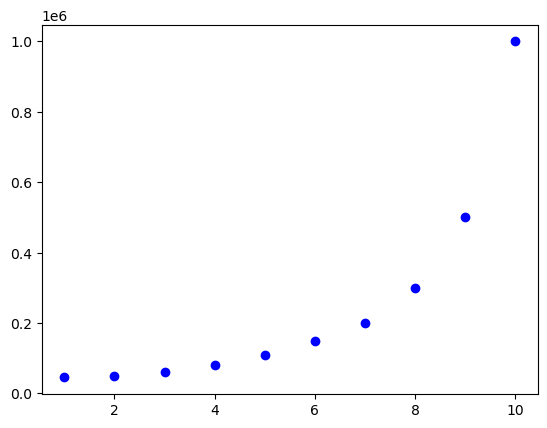

In [22]:
plt.scatter(x,y,color="blue")

We are comparing here two Regression model Linear Regression & Polynomial Regression

Training the Linear model Regression on the whole dataset

In [13]:
lin_model = LinearRegression()
print("Model is Loaded")

Model is Loaded


In [14]:
lin_model_fitted = lin_model.fit(x,y)
print("Model is Trained")

Model is Trained


In [15]:
lin_model_pred = lin_model_fitted.predict(x)

In [16]:
lin_model_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

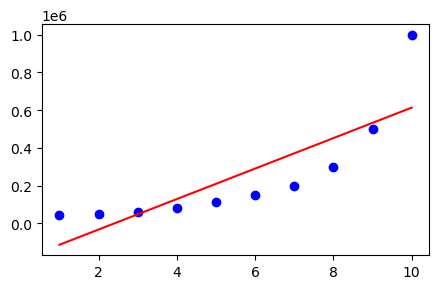

In [21]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color="blue")
plt.plot(x,lin_model_pred,color="red")

Training the polynomial model on the whole dataset

In [24]:
poly_model = PolynomialFeatures(degree=3)
print("Loaded the Polynomial feature Model")

Loaded the Polynomial feature Model


In [25]:
x_poly = poly_model.fit_transform(x)
print(x_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [27]:
poly_model_fitted = poly_model.fit(x_poly,y)
print("Model is Trained")

Model is Trained


In [28]:
lin2_model = LinearRegression()

In [29]:
lin2_model_fitted = lin2_model.fit(x_poly,y)
print("Model is Trained")

Model is Trained


In [30]:
lin2_model_pred = lin2_model_fitted.predict(x_poly)

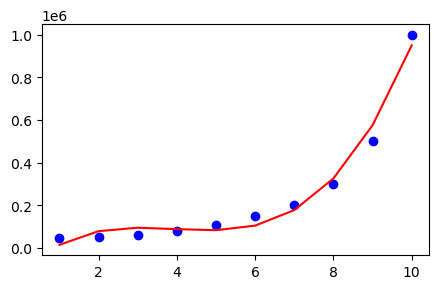

In [33]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color="blue")
plt.plot(x,lin2_model_pred,color="red")

Checking the Accuracy of Linear Regression

In [35]:
acc_lin_model = r2_score(y,lin_model_pred)
print(acc_lin_model)

0.6690412331929895


Checking the Accuracy of Polynomial Regression

In [36]:
acc_lin2_model = r2_score(y,lin2_model_pred)
print(acc_lin2_model)

0.9812097727913366
